In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [3]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [4]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [5]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [6]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [7]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [8]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [9]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [10]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [11]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [12]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [13]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [14]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [15]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [16]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [17]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [18]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [20]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [24]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Outbending DVCS

In [82]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/epg/"
epg_4398 = pd.read_pickle(parent_epg + "4398" + "_epg.pkl")
epg_4243 = pd.read_pickle(parent_epg + "4243" + "_epg.pkl")

In [83]:
dvcsSimOutb = epg_4398
bkgSimOutb = epg_4243

In [84]:
dvcsSimOutb = dvcsSimOutb.loc[dvcsSimOutb.Ge>2]
bkgSimOutb = bkgSimOutb.loc[bkgSimOutb.Ge>2]

## CDFT cuts

In [110]:
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]

In [86]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [91]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_ep<0.321)&(dvcsSimOutbCDFT.MM2_ep>-0.244)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MM2_ep<0.321)&(bkgSimOutbCDFT.MM2_ep>-0.244)]
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_eg<1.352)&(dvcsSimOutbCDFT.MM2_eg>0.418)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MM2_eg<1.352)&(bkgSimOutbCDFT.MM2_eg>0.418)]
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.ME_epg<0.299)&(dvcsSimOutbCDFT.ME_epg>-0.275)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.ME_epg<0.299)&(bkgSimOutbCDFT.ME_epg>-0.275)]
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.coplanarity<4.742)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.coplanarity<4.742)]
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MPt<0.0627)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MPt<0.027)]
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.reconGam<0.578]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[bkgSimOutbCDFT.reconGam<0.578]
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_epg<0.000629)&(dvcsSimOutbCDFT.MM2_epg>-0.00423)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MM2_epg<0.000629)&(bkgSimOutbCDFT.MM2_epg>-0.00423)]

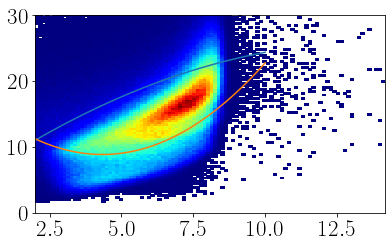

In [114]:
# plt.hist2d(dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.coneAngle<np.poly1d([0.557, -5.221, 19.651])(dvcsSimOutbCDFT.Gp),"Gp"], dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.coneAngle<np.poly1d([0.557, -5.221, 19.651])(dvcsSimOutbCDFT.Gp),"coneAngle"], bins = 100, cmin = 1, cmap = cmap)
plt.hist2d(dvcsSimOutbCDFT.Gp, dvcsSimOutbCDFT.coneAngle, bins = [100, np.linspace(0, 30, 101)], cmin = 1, cmap = cmap)
plt.plot(np.linspace(2, 10, 101), np.poly1d([-0.106, 2.940, 5.527])(np.linspace(2, 10, 101)))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.434, -3.766, 16.994])(np.linspace(2, 10, 101)))
plt.show()

In [113]:
CR = dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.coneAngle<np.poly1d([0.557, -5.221, 19.651])(dvcsSimOutbCDFT.Gp),"Gp"]

In [87]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

1.4432899320127035e-15 246.24940964406656 94
[ 0.44276622  0.03569569  0.12647488  0.82394694  0.43378214 -2.36554407] -0.2240519605312445 0.29544334861588484 1.4432899320127035e-15
0.06294492866135981 115.821707375409 94
[ 0.30169323  0.03491774  0.10485989  1.52607594  0.96803838 -8.78478525] -0.18043813964282032 0.2502736194582471 0.06294492866135981
0.6491614166627209 88.20102290991338 94
[  0.21346939   0.03504377   0.09176257   2.04518095   1.485127
 -15.68275078] -0.153413507910393 0.22350105200130116 0.6491614166627209
0.2066997640474696 104.95270057789133 94
0.6335371244099098 88.75202422052584 94
0.7304624088973182 85.19686620334974 94
[ 8.14314635e-02  3.78632360e-02  6.39217914e-02  3.39882633e+00
  3.21465803e+00 -4.02503208e+01] -0.09341607352853691 0.1691425455561611 0.7304624088973182
0.5172724568682803 92.74406389521424 94
0.7549782850898141 84.22402015346938 94
[ 0.43242912  0.0386423   0.0941486   2.52798102  0.43333138 -4.86135447] -0.15471527464019175 0.23199988453

In [88]:
len(dvcsSimOutbCDFT)

2084079

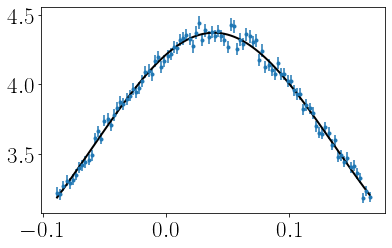

In [89]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [90]:
print(lb_opt, ub_opt)

-0.24380348760360138 0.32108809750133005


In [42]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_ep<0.321)&(dvcsSimOutbCDFT.MM2_ep>-0.244)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MM2_ep<0.321)&(bkgSimOutbCDFT.MM2_ep>-0.244)]

In [43]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 392623.74169889034 94
0.0 258.86035137349944 94
0.06612391536532747 115.42502292240073 94
[ 0.43445156  0.88549516  0.15221572 -2.7256868   7.68513791 -3.89536118] 0.5728822954688841 1.1981080318524315 0.06612391536532747
0.4186230916105733 96.167238123006 94
[ 0.47365276  0.88493965  0.15488445 -2.51378492  7.09495909 -3.54355627] 0.5668458799228293 1.2030334235637263 0.4186230916105733
0.07553859302860277 114.3353734960104 94
0.3258663357854572 99.63371546218849 94
0.02476085232575187 122.78231360952063 94
0.4982071994612314 93.39555590849417 94
[ 0.46225211  0.88487719  0.1538002  -2.65207246  7.46738036 -3.75154768] 0.5690101969140946 1.2007441808007524 0.4982071994612314
0.02693418625550159 122.19130823857614 94
0.5139556809191983 92.85724010187725 94
[ 0.4813219   0.88501209  0.15552257 -2.45827947  6.94467452 -3.45902591] 0.5656077691067983 1.204416406792787 0.5139556809191983


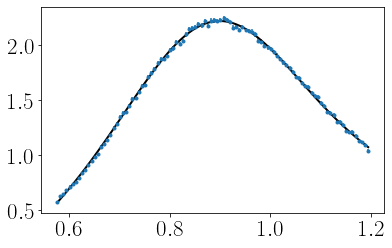

In [44]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [45]:
print(lb_opt, ub_opt)

0.4184443631570891 1.3515798127424963


In [46]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_eg<1.352)&(dvcsSimOutbCDFT.MM2_eg>0.418)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MM2_eg<1.352)&(bkgSimOutbCDFT.MM2_eg>0.418)]

In [47]:
len(dvcsSimOutbCDFT)

993078

In [48]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 16638.04670913926 94
0.0 3600.9040456263533 94
0.0 319.29622599376734 94
0.5097775864918319 92.99989167687102 94
[ 3.64617537e-01  1.23089549e-02  9.56368856e-02  1.99273955e+00
  2.43862514e+00 -2.43655673e+01] -0.18410519473251905 0.20872310455018822 0.5097775864918319
0.3775152987461803 97.65967859771953 94
0.004959932584410187 133.1070091208207 94
0.0020683575773626783 138.14953526681668 94
0.037727117089119355 119.75753965344602 94
0.2392646479195748 103.34820638634658 94
0.004061042772263046 134.28878654620996 94


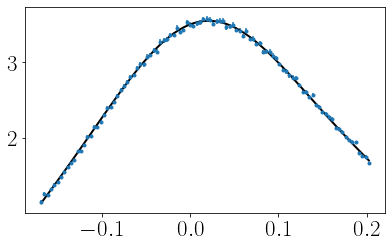

In [49]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [50]:
print(lb_opt, ub_opt)

-0.2746017019264181 0.2992196117440873


In [51]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.ME_epg<0.299)&(dvcsSimOutbCDFT.ME_epg>-0.275)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.ME_epg<0.299)&(bkgSimOutbCDFT.ME_epg>-0.275)]

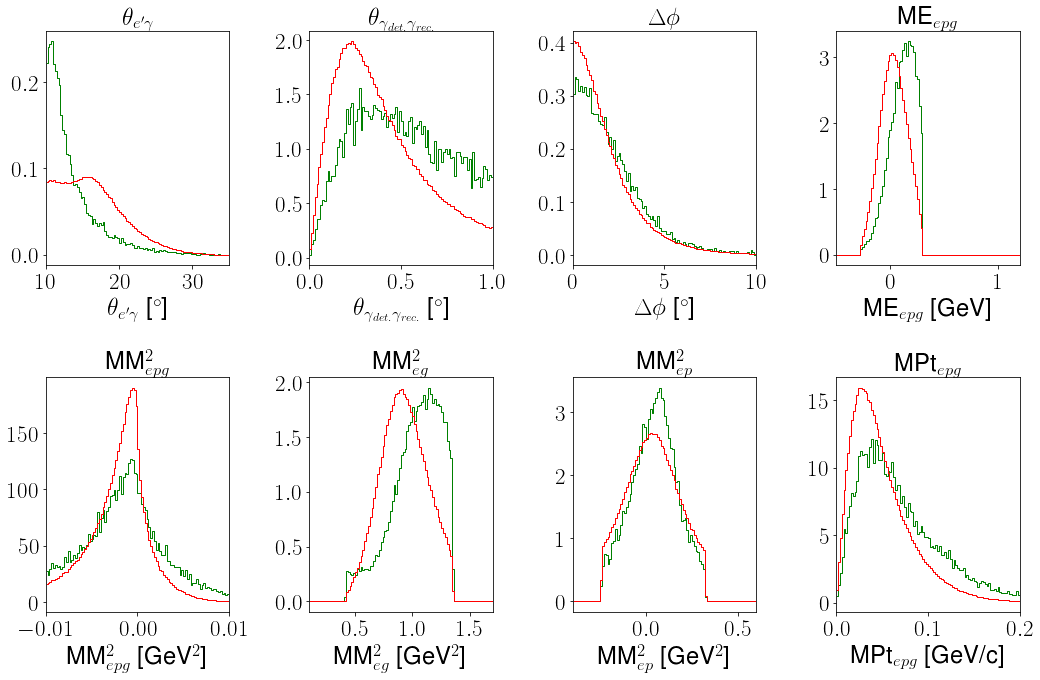

<Figure size 432x288 with 0 Axes>

In [52]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [53]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.8, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b, c  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 9#max(halfnorm.ppf(0.9, scale = scale), 0.002)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 1328.596297873893 95
[ 0.48402272  1.5806952   0.164681   -0.03597123  0.00200324] 0 9 0.0
0.0 354.54545062279243 95
0.0 354.54596664277074 95
0.0 354.54596664277074 95
0.0 354.54596664277074 95
0.0 354.54596664277074 95
0.0 354.54596664277074 95
0.0 354.54596664277074 95
0.0 354.54596664277074 95
0.0 354.54596664277074 95


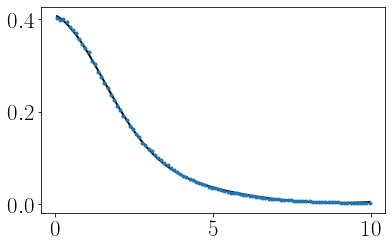

In [54]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [55]:
print(ub_opt)

4.742085595025342


In [56]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.coplanarity<4.742)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.coplanarity<4.742)]

In [57]:
np.linspace(3, 8.5, 12)

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5])

In [58]:
GeEdges = np.linspace(3.5, 8.5, 11)
lbs = []
ubs = []
for j in range(len(GeEdges[:-1])):
    df1 = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.Ge>GeEdges[j])&(dvcsSimOutbCDFT.Ge<GeEdges[j+1])]
    df2 = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.Ge>GeEdges[j])&(bkgSimOutbCDFT.Ge<GeEdges[j+1])]
    pvalue_opt = 0
    for i in range(0, 1):
        if i == 0:
            print(len(df1))
            simDist_dvcs, bins = np.histogram(df1.coneAngle, bins = 21)
            bins = np.linspace(bins[np.argmax(simDist_dvcs)] -2.5, bins[np.argmax(simDist_dvcs)] + 4, 21)
            simDist_dvcs, _ = np.histogram(df1.coneAngle, bins = bins)
            simDist_dvpi0, _ = np.histogram(df2.coneAngle, bins = bins)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
            uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
            params = [1, bins[np.argmax(simDist)], 2.5, 0, 0, 0]
        else:
            simDist_dvcs, bins = np.histogram(df1.coneAngle, bins = np.linspace(lb, ub, 101))
            simDist_dvpi0, bins = np.histogram(df2.coneAngle, bins = np.linspace(lb, ub, 101))
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
            uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
        params = res_lsq.x
        Amp, loc, scale, a, b, c = params
        lb = norm.ppf(0.02, loc = loc, scale = scale)
        ub = norm.ppf(0.98, loc = loc, scale = scale)
        pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
        print(pvalue, chi2fit, dof)
        if pvalue>pvalue_opt:
            pvalue_opt = pvalue
            bins_opt = bins
            bincenters_opt = bincenters
            params_opt = res_lsq.x
            lb_opt = loc - 3*scale
            ub_opt = loc + 3*scale
            lbs.append(lb_opt)
            ubs.append(ub_opt)
            dist_opt = simDist
            unc_opt = uncDist
            print(params_opt, lb, ub, pvalue)

48951
0.0205883567447942 26.77553340787081 14
[ 4.26792094e-01  1.03042873e+01  1.17232048e+00 -2.42276155e-02
  4.23511222e-02 -2.93640681e-03] 7.896635390178308 12.711939223969795 0.0205883567447942
56046
0.0006722021192328009 37.26652575134256 14
[ 2.17742431e-01  1.08804789e+01  1.18160110e+00 -6.10178563e-01
  1.54194883e-01 -7.76111045e-03] 8.453766939609707 13.307190874848583 0.0006722021192328009
60307
0.42280684001736224 14.366111486078024 14
[ 4.10803808e-01  1.17731215e+01  1.36674042e+00  1.09822906e-01
  1.66923083e-02 -1.46424501e-03] 8.966179885454913 14.58006317531446 0.42280684001736224
64800
0.18465503615989776 18.507001402480597 14
[ 3.83055970e-01  1.27784375e+01  1.32832905e+00  1.53664592e-01
  9.36304556e-03 -1.05114454e-03] 10.050383180642374 15.50649185020464 0.18465503615989776
71698
0.5600252665229768 12.577528531887879 14
[ 3.06722459e-01  1.37522041e+01  1.23425782e+00 -2.44778700e-01
  6.65052334e-02 -2.91762937e-03] 11.21734844075098 16.287059751320328 0.

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


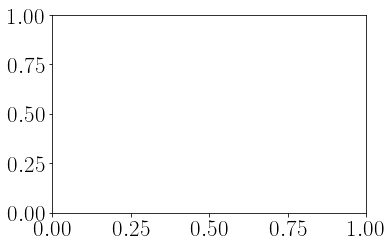

In [70]:
plt.hist2d(dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.coneAngle<np.poly1d([0.434, -3.766, 16.994])(dvcsSimOutbCDFT.Gp),"Gp"], dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.coneAngle<np.poly1d([0.434, -3.766, 16.994])(dvcsSimOutbCDFT.Gp),"coneAngle"], bins = 100, cmin = 1, cmap = cmap)
plt.plot(np.linspace(2, 10, 101), np.poly1d([-0.106, 2.940, 5.527])(np.linspace(2, 10, 101)))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.434, -3.766, 16.994])(np.linspace(2, 10, 101)))
plt.show()

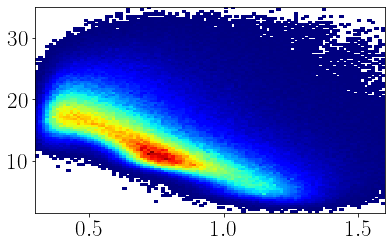

In [63]:
plt.hist2d(dvcsSimOutbCDFT.Pp, dvcsSimOutbCDFT.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

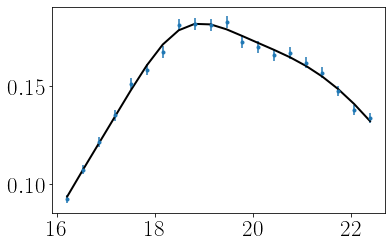

In [60]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [61]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[-0.1058125   2.93981217  5.52654352]
[ 0.43375082 -3.76582526 16.99359935]


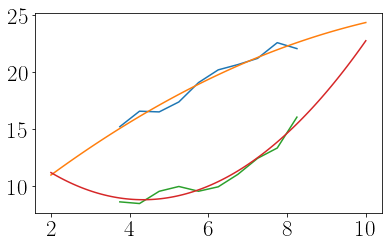

In [73]:
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([-0.106, 2.940, 5.527])(np.linspace(2, 10, 101)))
print(res_lsq.x)
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.434, -3.766, 16.994])(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [68]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.coneAngle<np.poly1d([-0.106, 2.940, 5.527])(dvcsSimOutbCDFT.Gp))&(dvcsSimOutbCDFT.coneAngle>np.poly1d([0.434, -3.766, 16.994])(dvcsSimOutbCDFT.Gp))]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.coneAngle<np.poly1d([-0.106, 2.940, 5.527])(bkgSimOutbCDFT.Gp))&(bkgSimOutbCDFT.coneAngle>np.poly1d([0.434, -3.766, 16.994])(bkgSimOutbCDFT.Gp))]

In [69]:
len(dvcsSimOutbCDFT)

606614

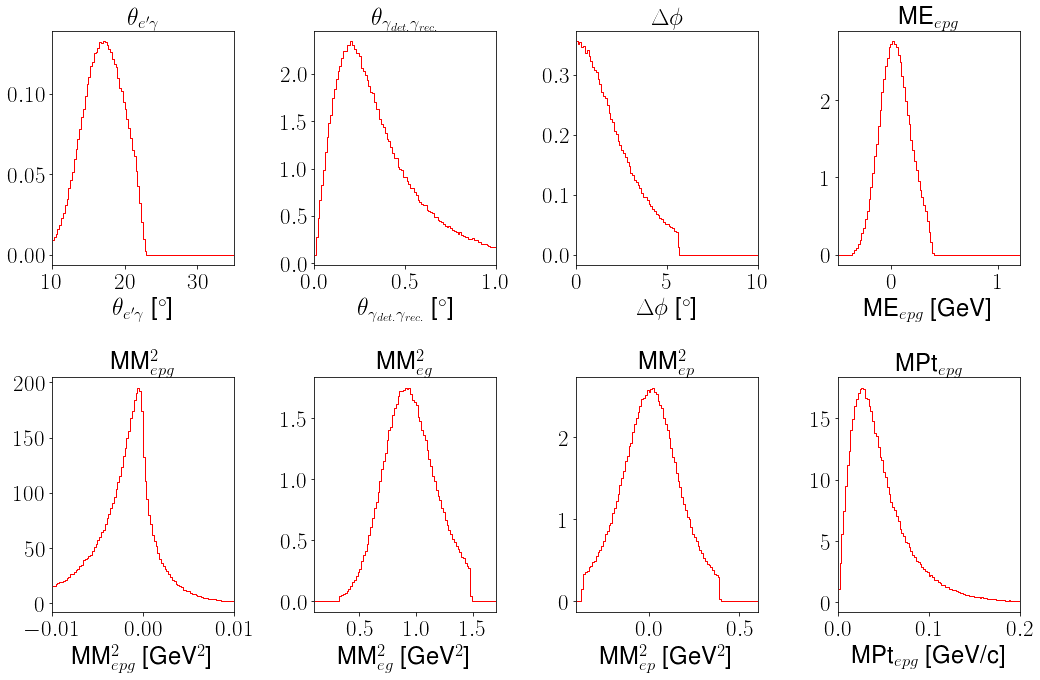

<Figure size 432x288 with 0 Axes>

In [76]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [71]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MPt, bins = np.linspace(0.005, 0.05, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MPt, bins = np.linspace(0.005, 0.05, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = min(norm.ppf(0.9, loc = loc, scale = scale), 0.04)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+3*scale#norm.ppf(1-0.0013, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.3858699768394782 14.88776189247795 14
[ 4.85548889e-01  1.98214980e-02  1.42797846e-02 -4.47111563e+00
  1.13300007e+03 -1.45543452e+04] 0.005 0.03812177826683344 0.3858699768394782
0.35818923765864286 98.38323961187047 94
0.23879470649652523 103.3703439449792 94
0.23933944693701492 103.34468530656864 94
0.23975045438299758 103.32534972080666 94
0.24010517047854552 103.30867878363075 94
0.2402239996899077 103.30309745233068 94
0.24036986466116683 103.29624859791672 94
0.24052796778340224 103.28882801630108 94
0.24053874870667014 103.28832212247245 94


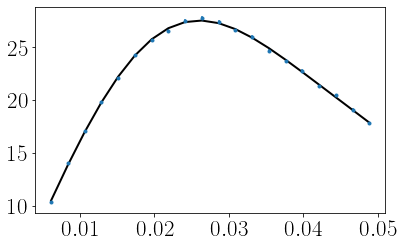

In [72]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [79]:
params_opt

array([ 2.19169338e+00,  1.96463931e-02,  2.15950661e-02, -2.61857371e+01,
        5.61495574e+02,  2.85677253e+02])

In [73]:
print(ub_opt)

0.0626608517067376


In [81]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MPt<0.0627)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MPt<0.027)]

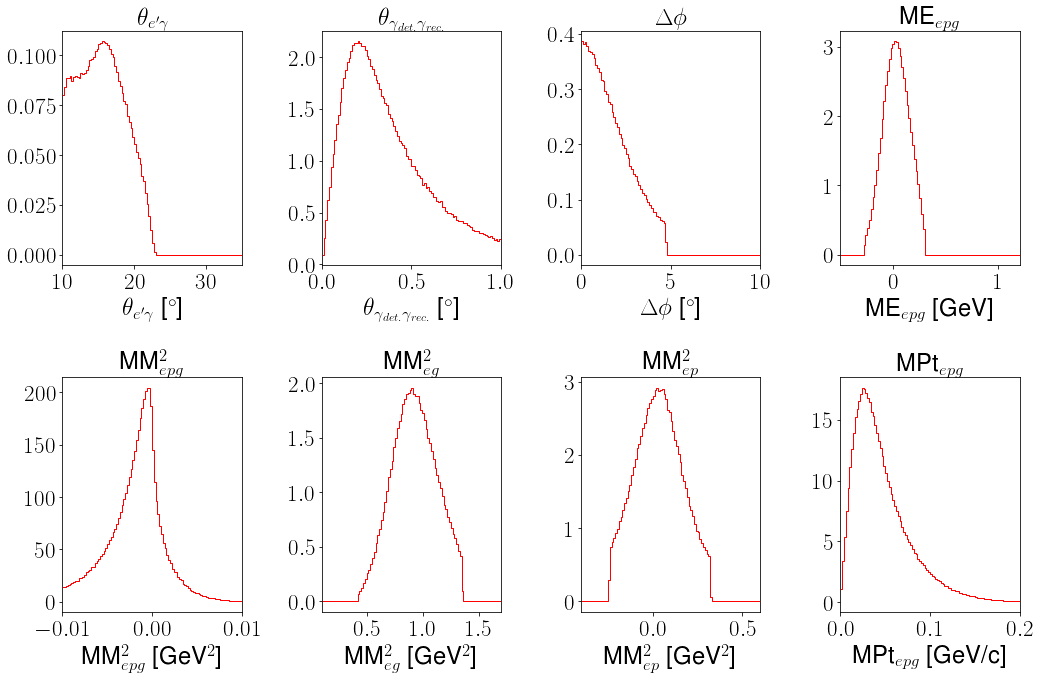

<Figure size 432x288 with 0 Axes>

In [74]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [75]:
pvalue_opt = -0.1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.reconGam, bins = np.linspace(0.005, 0.6, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.reconGam, bins = np.linspace(0.005, 0.6, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.6)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+3*scale
#         print(ub_opt, loc + 3*scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

8.664922492751526e-05 154.40370771506747 94
[  0.83763187   0.14703778   0.14363137  -1.38194967  11.39609456
 -12.92685254] 0.005 0.6 8.664922492751526e-05


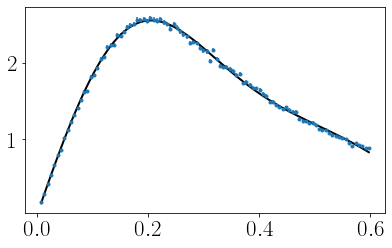

In [76]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [77]:
print(ub_opt)

0.5779318841428143


In [78]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.reconGam<0.578]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[bkgSimOutbCDFT.reconGam<0.578]

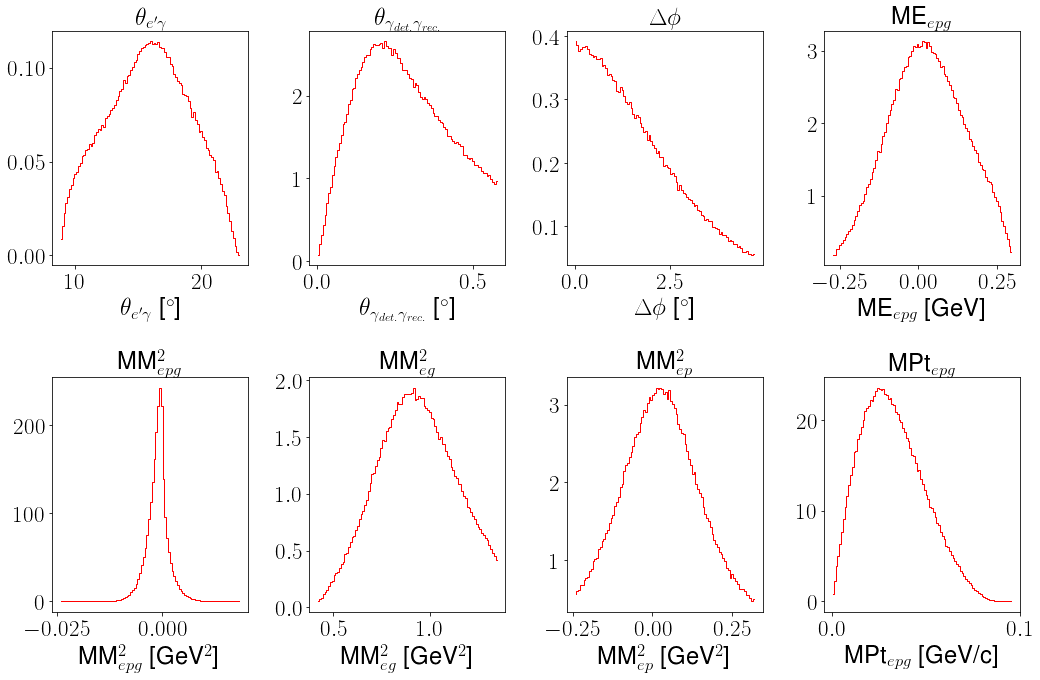

<Figure size 432x288 with 0 Axes>

In [79]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [80]:
len(dvcsSimOutbCDFT)

453173

In [57]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MM2_epg, bins = np.linspace(-0.01, 0.01, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MM2_epg, bins = np.linspace(-0.01, 0.01, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.1, 0, 0.01, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MM2_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MM2_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  a, loc, scale, b, c, d  = params
#     lb = min(norm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = min(skewnorm.ppf(0.1, a=a, loc = loc, scale = scale), -0.01)
    ub = max(skewnorm.ppf(0.9, a=a, loc = loc, scale = scale), 0.01)
    pvalue, chi2fit, dof = probFit(simDist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = skewnorm.ppf(0.0013, a=a, loc = loc, scale = scale)
        ub_opt = skewnorm.ppf(1-0.0013, a=a, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 25246.75748371123 93
[ 5.41495308e-01 -3.93677102e+00  4.30422085e-04  2.71683637e-03
  3.10379070e+01 -1.49563464e+03 -2.43304586e+05] -0.01 0.01 0.0
0.0 25247.27045476916 93
0.0 25247.491181767902 93
0.0 25247.58544352651 93
0.0 25247.627555058243 93
0.0 25247.64499850534 93
0.0 25247.652152675 93
0.0 25247.656699506213 93
0.0 25247.656612047598 93
0.0 25247.657232625515 93


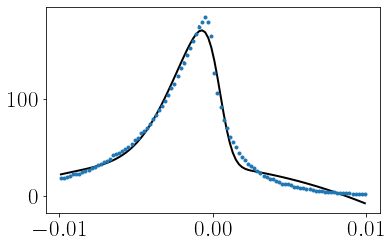

In [59]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [60]:
print(ub_opt, lb_opt)

0.0018355259270278284 -0.008306868689342405


In [133]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_epg<0.000629)&(dvcsSimOutbCDFT.MM2_epg>-0.00423)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MM2_epg<0.000629)&(bkgSimOutbCDFT.MM2_epg>-0.00423)]

In [81]:
print(dvcsSimOutbCDFT.MM2_epg.mean()-3*dvcsSimOutbCDFT.MM2_epg.std(), dvcsSimOutbCDFT.MM2_epg.mean()+3*dvcsSimOutbCDFT.MM2_epg.std())

-0.00884444430558239 0.006531348609433819
